In [1]:
# Libraries loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib notebook
import seaborn as sns

In [2]:
# path to all data files
path1 = "Data/features.csv"

In [3]:
#reading csv files 
features = pd.read_csv(path1)

In [4]:
#verifying file is read correctly
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
#checking data types 
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [6]:
#converting date type to datatime 
features['Date'] =pd.to_datetime(features['Date'])

In [7]:
#verifying the data type conversion
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [8]:
# adding columns week and year column to the data frame for grouping and analyzing data
features['Week'] = features.Date.dt.week
features['Year'] = features.Date.dt.year

In [9]:
#verifing data columns are added
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9,2010


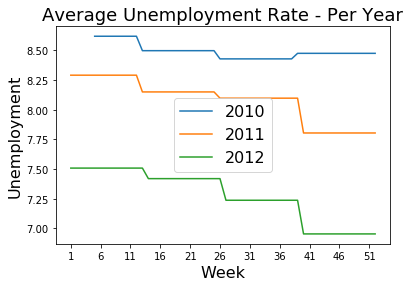

<Figure size 432x288 with 0 Axes>

In [14]:
#claculate mean for unemployment each week and plot for each year to analyzed if it is a contributing factor towards higher sales for that year
unemployment_2010 = features[features.Year==2010]['Unemployment'].groupby(features['Week']).mean()
unemployment_2011 = features[features.Year==2011]['Unemployment'].groupby(features['Week']).mean()
unemployment_2012 = features[features.Year==2012]['Unemployment'].groupby(features['Week']).mean()
#plt.figure(figsize=(20,8))
plt.plot(unemployment_2010.index, unemployment_2010.values)
plt.plot(unemployment_2011.index, unemployment_2011.values)
plt.plot(unemployment_2012.index, unemployment_2012.values)
#plt.grid()
plt.xticks(np.arange(1, 53, step=5))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Unemployment Rate - Per Year', fontsize=18)
plt.ylabel('Unemployment', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()
plt.savefig("results/average_unemployment_rate_per_year.png")

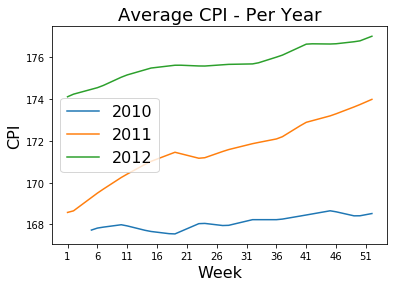

<Figure size 432x288 with 0 Axes>

In [16]:
#claculate mean for weekly cpi and plot for each year to analyzed if it is a contributing factor towards higher sales for the year
cpi_2010 = features[features.Year==2010]['CPI'].groupby(features['Week']).mean()
cpi_2011 = features[features.Year==2011]['CPI'].groupby(features['Week']).mean()
cpi_2012 = features[features.Year==2012]['CPI'].groupby(features['Week']).mean()
#plt.figure(figsize=(20,15))
plt.plot(cpi_2010.index, cpi_2010.values)
plt.plot(cpi_2011.index, cpi_2011.values)
plt.plot(cpi_2012.index, cpi_2012.values)
#plt.grid()
plt.xticks(np.arange(1, 53, step=5))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average CPI - Per Year', fontsize=18)
plt.ylabel('CPI', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()
plt.savefig("results/average_cpi_per_year.png")